In [ ]:
import pandas as pd
#данные размеченные
df = pd.read_csv("output.csv")


In [ ]:
df.head(10) # выводим

,comment,rating,speed_satisfaction,quality_satisfaction,staff_satisfaction,request_satisfaction,issue_resolved,job_not_complete
0,спасибо,5.0,0,0,0,1,1,0
1,спасибо!,5.0,0,0,0,1,1,0
2,Отлично,5.0,1,1,1,1,1,0
3,Благодарю за оперативное решение проблемы !,5.0,1,1,1,1,1,0
4,Прекрасный специалист! Побольше таких,5.0,0,1,1,1,1,0
5,Спасибо,5.0,0,0,0,0,1,0
6,"пересчет, и скорость",1.0,1,0,0,0,0,0
7,Спасибо за обновление покраски стен,5.0,0,1,1,1,1,0
8,выполнили быстро,5.0,1,0,0,0,1,0
9,Спасибо!,5.0,0,0,0,0,1,0


In [ ]:
df.info() # информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comment               2373 non-null   object 
 1   rating                2373 non-null   float64
 2   speed_satisfaction    2373 non-null   int64  
 3   quality_satisfaction  2373 non-null   int64  
 4   staff_satisfaction    2373 non-null   int64  
 5   request_satisfaction  2373 non-null   int64  
 6   issue_resolved        2373 non-null   int64  
 7   job_not_complete      2373 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 148.4+ KB


In [ ]:
df.describe() #немного статистики

,rating,speed_satisfaction,quality_satisfaction,staff_satisfaction,request_satisfaction,issue_resolved,job_not_complete
count,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000,2373.000000
mean,4.954909,0.525495,0.453856,0.459334,0.852086,0.920775,0.032870
std,0.382024,0.499455,0.497971,0.498449,0.355090,0.270146,0.178333
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Список столбцов, в которых считаем единицы
columns_of_interest = [
    'speed_satisfaction',
    'quality_satisfaction',
    'staff_satisfaction',
    'request_satisfaction',
    'issue_resolved',
    'job_not_complete'
]

#  пропуски заменены на 0 и всё в тип int
df[columns_of_interest] = df[columns_of_interest].fillna(0).astype(int)

#количества единиц
one_counts = (df[columns_of_interest] == 1).sum()

print(one_counts)


speed_satisfaction      1247
quality_satisfaction    1077
staff_satisfaction      1090
request_satisfaction    2022
issue_resolved          2185
job_not_complete          78
dtype: int64


In [ ]:
# Фильтруем строки, где job_not_complete == 1
filtered_comments = df[df['job_not_complete'] == 1]

# выводим только столбец с комментариями
df1 = filtered_comments['comment']
df1.head(15)

,comment
21,Норм
82,снимаю звезду за первую отписку без выполнения...
118,Надолго ли(
119,Надолго ли(
140,Надолго ли
646,"Сделали после того,как написали в наш город за..."
830,"ответили быстро, но увы ничего не смогут сделать."
961,электрик снял показания. будем ждать ответ
1133,Норм
1167,Кнопка лифта 6 этажа в грузовом лифте до сих п...


In [ ]:
import pandas as pd # импорт библиотек
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report


# 2. Переименуем колонки
df = df.rename(columns={
    'Нравится скорость отработки заявок': 'speed_satisfaction',
    'Нравится качество выполнения заявки': 'quality_satisfaction',
    'Нравится качество работы сотрудников': 'staff_satisfaction',
    'Понравилось выполнение заявки': 'request_satisfaction',
    'Вопрос решен': 'issue_resolved',
    'Работа не выполнена': 'job_not_complete'

})

# 3. выбираем нужные колонки
df = df[['comment', 'speed_satisfaction', 'quality_satisfaction', 'staff_satisfaction',
         'request_satisfaction', 'issue_resolved', 'job_not_complete']].dropna()

# приводим категории к int (на всякий)
y = df.drop(columns=['comment']).astype(int)
X = df['comment']

# 4. разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. векторизация текста
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# # 6. Обучение модели
# base_model = LogisticRegression()
# multi_model = MultiOutputClassifier(base_model)
# multi_model.fit(X_train_vec, y_train)

# # 7. предсказание
# y_pred = multi_model.predict(X_test_vec)

# # 8. метрики для каждой категории
# for i, col in enumerate(y.columns):
#     print(f"== {col} ==")
#     print(classification_report(y_test[col], y_pred[:, i]))


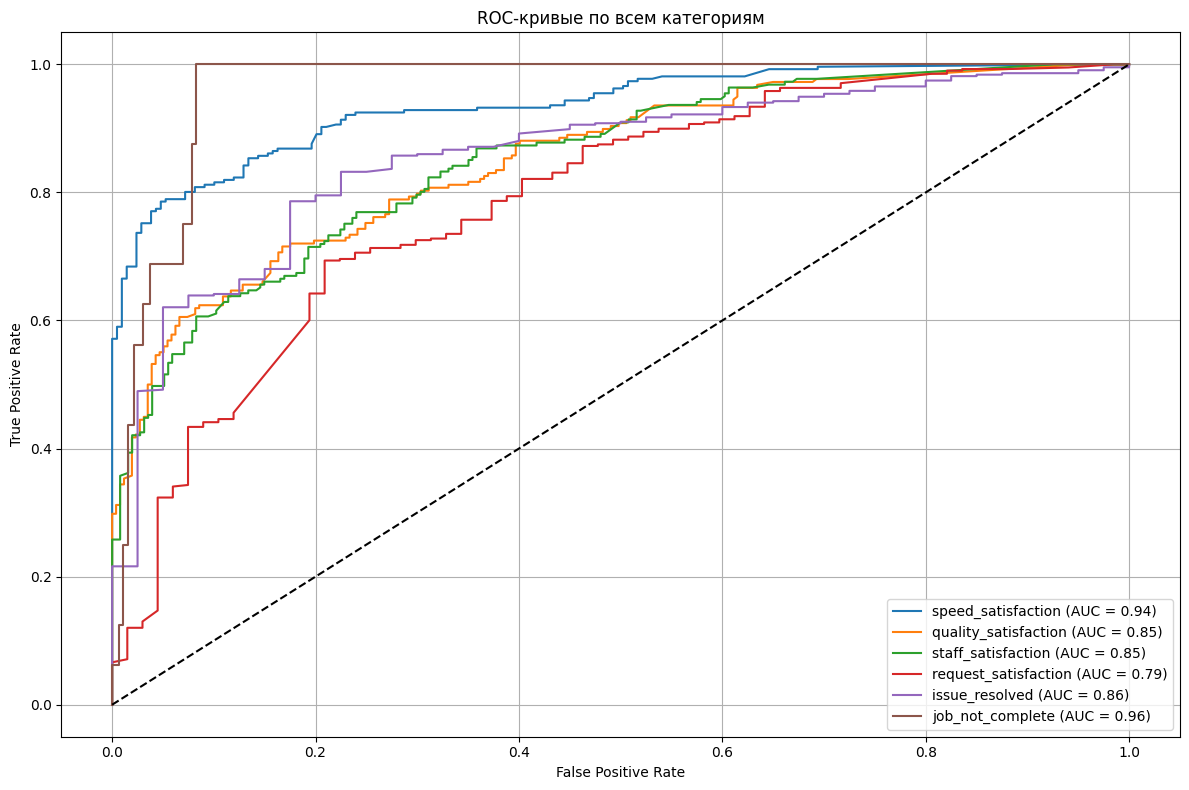

In [ ]:

# 4. обучение
model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train_vec, y_train)
y_score = model.predict_proba(X_test_vec)


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# 5. ROC-кривые
plt.figure(figsize=(12, 8))
for i, col in enumerate(y.columns):
    fpr, tpr, _ = roc_curve(y_test[col], y_score[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{col} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые по всем категориям')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()